In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv(r'/Users/sharini/Downloads/IOT-temp.csv')
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [11]:
pd.value_counts(data['room_id/id'].unique())

Room Admin    1
dtype: int64

In [12]:
data.drop(['room_id/id'], axis = 1, inplace = True)
data.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [15]:
data['noted_date'] = pd.to_datetime(data['noted_date'])
data_new = data.set_index('noted_date')
data_new.head()

,id,temp,out/in
noted_date,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In


In [16]:
sum = data.groupby(data['out/in']).count()['id'].iloc[0] + data.groupby(data['out/in']).count()['id'].iloc[1]

print("sensor 'In' is {0}% and sensor 'Out' is {1}% of total".format(round(data.groupby(data['out/in']).count()['id'].iloc[0]/sum*100), round(data.groupby(data['out/in']).count()['id'].iloc[1]/sum*100)))

sensor 'In' is 21% and sensor 'Out' is 79% of total


In [17]:
data_new1 = data_new.groupby(data_new.index).mean()
data_new2 = data_new.groupby([data_new.index, 'out/in']).mean()

<AxesSubplot:xlabel='noted_date'>

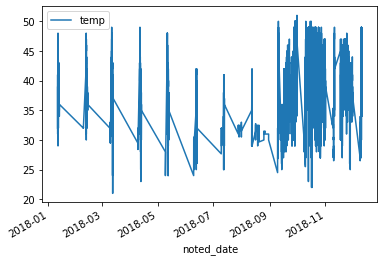

In [18]:
data_new1.plot()

In [19]:
pd.value_counts(data['noted_date'])

2018-12-09 03:09:00    65
2018-09-09 16:24:00    62
2018-09-09 17:31:00    53
2018-11-09 19:42:00    50
2018-09-09 16:08:00    50
                       ..
2018-11-22 21:23:00     1
2018-11-22 21:21:00     1
2018-10-21 05:41:00     1
2018-10-21 05:45:00     1
2018-10-21 21:54:00     1
Name: noted_date, Length: 27920, dtype: int64

In [20]:
data_new2.loc['2018-12-09 03:09:00']

temp
noted_date          out/in           
2018-12-09 03:09:00 In      28.473684
                    Out     28.500000

In [21]:
data_new_in = data_new[data_new['out/in'] == 'In'].groupby(['noted_date']).mean()
data_new_out = data_new[data_new['out/in'] == 'Out'].groupby(['noted_date']).mean()

Text(0, 0.5, 'temperature')

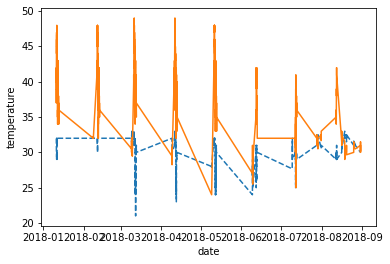

In [22]:
import matplotlib.pyplot as plt
plt.plot(data_new_in.loc[: '2018-9-09 03:09:00'], '--')
plt.plot(data_new_out.loc[: '2018-9-09 03:09:00'], '-')
plt.xlabel('date')
plt.ylabel('temperature')

In [23]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
data_new1
data_new1_mm = minmax_scale(data_new1)
scaler = StandardScaler()
data_new1_ss = scaler.fit_transform(data_new1)
print(data_new1_mm, '\n****************\n', data_new1_ss)

[[0.36666667]
 [0.63333333]
 [0.6       ]
 ...
 [0.76666667]
 [0.8       ]
 [0.76666667]] 
****************
 [[-0.91087583]
 [ 0.40151385]
 [ 0.23746514]
 ...
 [ 1.05770869]
 [ 1.2217574 ]
 [ 1.05770869]]


In [24]:
_, p = normaltest(data_new1_ss.squeeze())
print(f'significance: {p:.2f}')
_, p = normaltest(data_new1_mm.squeeze())
print(f'significance: {p:.2f}')

significance: 0.00
significance: 0.00


Text(0.5, 0, 'original')

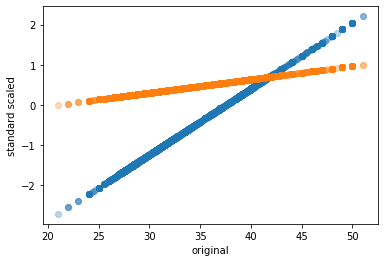

In [25]:
plt.scatter(data_new1, data_new1_ss, alpha = 0.3)
plt.scatter(data_new1, data_new1_mm, alpha = 0.3)

plt.ylabel('standard scaled')
plt.xlabel('original')

Text(0, 0.5, 'temperature')

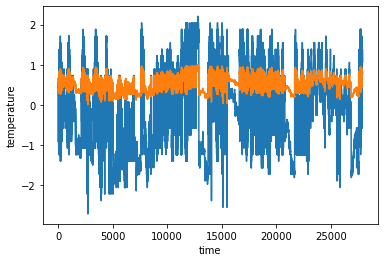

In [26]:
plt.plot(data_new1_ss)
plt.plot(data_new1_mm)
plt.xlabel('time')
plt.ylabel('temperature')

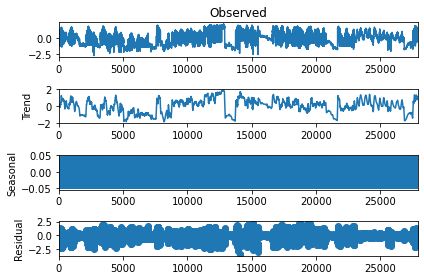

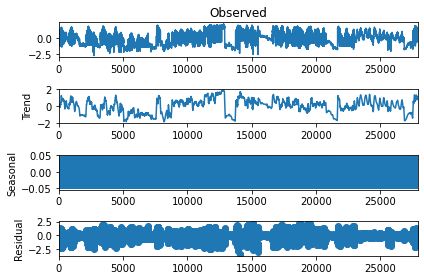

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_new1_ss, model = 'additive', period = 52)
result.plot()

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h = sm.tsa.arima.ARIMA(endog = data_new1_ss, order = (1, 1, 3))
model = h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27920
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -25921.069
Date:                Sat, 15 Apr 2023   AIC                          51852.139
Time:                        09:53:15   BIC                          51893.324
Sample:                             0   HQIC                         51865.399
                              - 27920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1023      0.039     -2.627      0.009      -0.179      -0.026
ma.L1         -0.7370      0.039    -18.978      0.000      -0.813      -0.661
ma.L2         -0.0264      0.033     -0.801      0.423      -0.091       0.038
ma.L3         -0.0933      0.004    -26.359      0.000      -0.100      -0.086
sigma2         0.3749      0.002    171.190      0.000       0.371       0.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9831.96
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

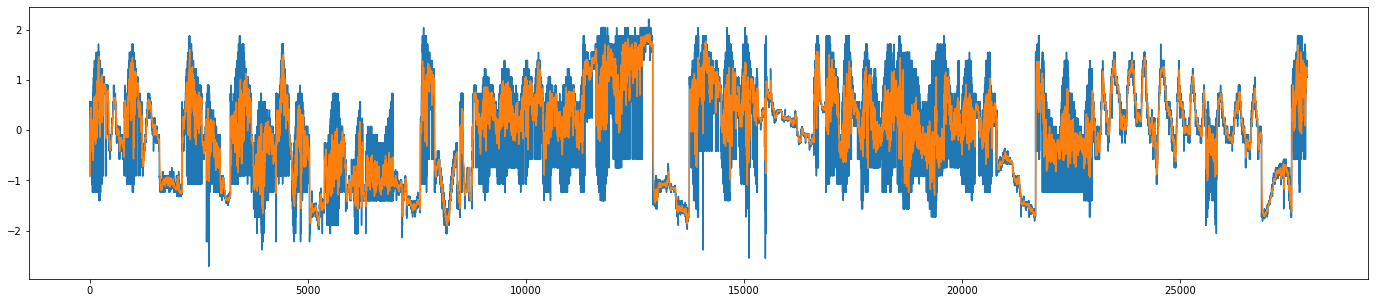

In [30]:
plt.figure(figsize = (24, 5))
plt.plot(data_new1_ss)
plt.plot(model.predict())
plt.show()